# Introduction
```
Choosing 1990 California Housing Price to perform E2E data analysis. The sample used in this has some of the features removed and a categorical data is added by the author. 
```
# <b> Step 1 - Frame the Problem </b>
```
Objective: Build a predictive model of housing price in the state. The model should be able to predict median price of the house in any district (block group with population 600 to 3000), given all metrics. 
This module is upstream to investment analysis ML program which will determine if it is worth investing in that area. This module is key for business decision and will impact revenue.
Currently, the whole pricing is performed manually by experts; team gather most up to date information about the district and typically thier perdictions are off by more than 20% 

So, here are some bullet points for framing the problem 
- Is this supervised/unsupervised/reinforcement? - Supervised 
- Is it classification or regression? - Regression. Multiple regression problem. As system is use multiple features to make predictions. Also is univariate problem; i.e. single value prediction for each district. 
- Is it online learning or batch learning? - Batch as once trained it will be valid until next census is done and training data is available
```


# <b> Step 2 - Get the Data </b>

In [1]:
import os 
import tarfile
import urllib 

# identify the place from where Housing dataset needs to be downloaded. 
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master'
HOUSING_PATH = os.path.join("DATA", "Chapter2", "housing")
HOUSING_URL = DOWNLOAD_ROOT + '/datasets/housing/housing.tgz'

In [2]:
import urllib.request

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)

    # give the output file name 
    tgz_path = os.path.join(housing_path, 'housing.tgz')

    # retrieve data from url to local machine 
    urllib.request.urlretrieve(housing_url, tgz_path)

    # extract data from the tar file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

files = os.listdir(HOUSING_PATH)

# validate if file already present or not. If not then no need to download it again 
if "housing.csv" not in files: 
    fetch_housing_data()

In [3]:
# load the dataset 
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

df_housing = load_housing_data()

In [4]:
# display housing head data 
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# About Data
```
a. Each row represent one district 
b. There are 10 attributes - longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity
c. There are over 20640 instances which is fairly small in ML standard. 
d. total_bedrooms is a nullable field with only 20433 instances. So over 207 districts have this feature missing 
e. All features are numeric except for ocean promixity which is a categorical data
```

In [6]:
df_housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Describe details 
    1. Notice total_bedrooms count is taken after ignoring the null values 
    2. Standard Deviation is the the measure how dispersed the data is
    3. 25%, 50% and 75% shows percentile values 

NOTE - Percentile indicates the value below which a given percentage of observations in a group of observations fall i.e. 25% of houses have house_median_age less than 18 years, 50% haves less than 29 and 75% have les than 37



In [7]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plot histogram and check the data spread 
    1. median_income does not look like expressed in Dollars. As per the book this feature is scaled and capped ast 15 and at 0.5. The number is roughly 10,000 x data i.e. 3 represents 30,000
    2. housing_median_age and median_house_value are also capped. 
    3. median_housing_value capping can be a problem as this is the target value we want our ML model to predict. This will introduce bias as model will never go beyond that limit. You have 2 options
        a. Collect proper lables for districts which are capped for this feature. 
        b. remove those districts from training and test set, if we want to system to predict value over 500000
    4. Attributes have different scales 
    5. Many histograms are tail heavy like i.e. they extend farther to right than to left. This will make ML model to detect any patterns 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

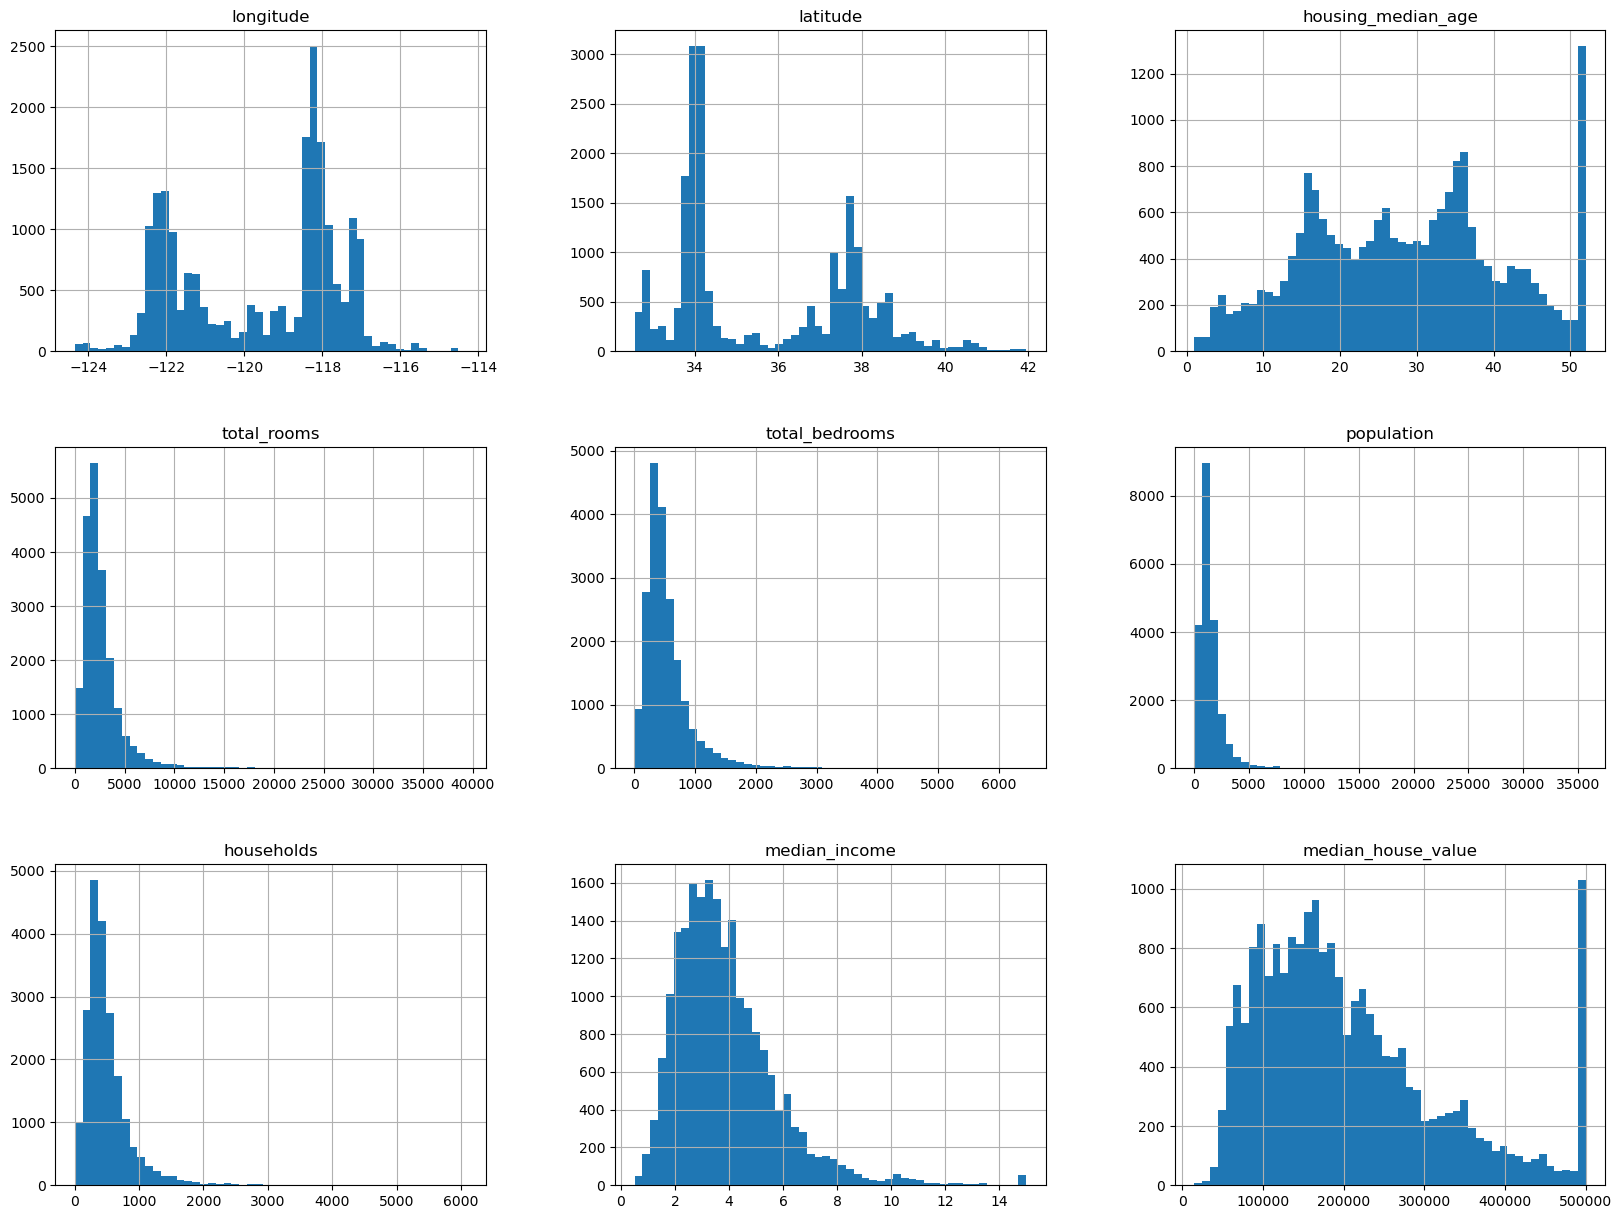

In [8]:
import matplotlib.pyplot as plt 
df_housing.hist(bins=50, figsize=(20, 15))

# Create test set

In [9]:
# try randomly splitting 
import numpy as np 

def split_train_test(data, test_ratio):

    # shuffle the indices 
    shuffled_indices = np.random.permutation(len(data))
    # print (shuffled_indices[:20])

    # get the size of the test set
    test_set_size = int(len(data) * test_ratio)

    # pick the test indices 
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df_housing, 0.2)
train_set.index

Index([ 3271, 14662,  9464, 20294,  5985, 11730, 16162, 17540,  5878, 10139,
       ...
        6248,  3444, 16953,  6790, 14529, 15406, 11930, 17397,   127,  3876],
      dtype='int64', length=16512)

In [10]:
# call it again to see if this gives repeatable values 
train_set, test_set = split_train_test(df_housing, 0.2)
train_set.index

Index([ 9526, 10881, 10597, 13075, 10752, 15819,  1866,   160, 17143, 18550,
       ...
        7751, 14941,  1350, 14573, 11105,  8755, 17252,  1516, 15717, 19212],
      dtype='int64', length=16512)

In [11]:
# use the seed value to get the repeatable result 
np.random.seed(42)
train_set, test_set = split_train_test(df_housing, 0.2)
train_set.index

Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,  6061,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=16512)

In [12]:
# check if getting repeatable values
np.random.seed(42)
train_set, test_set = split_train_test(df_housing, 0.2)
train_set.index

Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,  6061,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=16512)

In [13]:
# define method to allocate the hash value of each and rows with hash value less than or equal to 20% maximum hashvalue 
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32

print(test_set_check(1, 0.2)) 

False


In [14]:
# define method to split train and test data 
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    print (in_test_set[:5])
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# get the row index as id 
df_housing_index = df_housing.reset_index()
train_set, test_set = split_train_test_by_id(df_housing_index, 0.2, "index")
train_set.index

0    False
1    False
2     True
3    False
4    False
Name: index, dtype: bool


Index([    0,     1,     3,     4,     6,     7,     8,     9,    10,    11,
       ...
       20630, 20631, 20632, 20633, 20634, 20635, 20636, 20637, 20638, 20639],
      dtype='int64', length=16512)

In [16]:
# Add ID column other than the index value 
df_housing_index["id"] = df_housing_index["longitude"] * 1000 + df_housing_index["latitude"]
train_set, test_set = split_train_test_by_id(df_housing_index, 0.2, "id")
train_set.index

0    False
1    False
2    False
3    False
4    False
Name: id, dtype: bool


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       20628, 20629, 20630, 20631, 20634, 20635, 20636, 20637, 20638, 20639],
      dtype='int64', length=16322)

In [17]:
# using scikit learn internal method to create training and test sets 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)
train_set.index

Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,  6061,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=16512)

# working with median income feature

<Axes: >

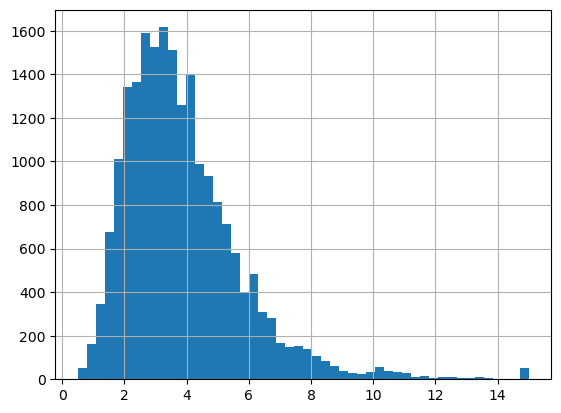

In [22]:
# generate median_income histogram to analyze 
df_housing['median_income'].hist(bins=50)

### Observations on Median Income 
    1. Most of the income ranges between 1.5 to 6 (15,000 to 60,000)
    2. There are other groups as well which has income over 6 as well 


In [23]:
# create a group of these median income ranges - call it income category
# Category 1 -> with income range between 0 to 1.5
# Category 2 -> with income range between 1.5 to 3
# and so on 
df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [30]:
df_housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [31]:
# check the propotion of data for each income category 
df_housing["income_cat"].value_counts()/len(df_housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

<Axes: >

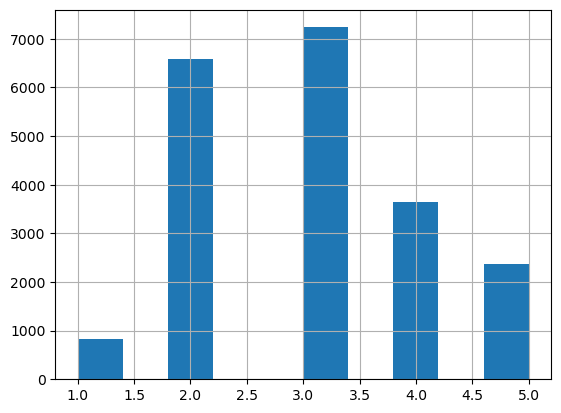

In [32]:
df_housing["income_cat"].hist()

## Stratified sampling - 
``` 
If there are 51.3% women and 48.7% males in US. Stratified sampling says to pick 1000 maintaining the propotions i.e. 1000 people with 513 women and 487 males
```

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified shuffle split object with number of reshuffling and split = 1. Also set test size is 20%
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
loop_counter = 0 

# loop will run only once because number of split mentioned is 1
for train_index, test_index in split.split(df_housing, df_housing['income_cat']):
    print (loop_counter)
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]
    loop_counter += 1 

strat_train_set.index

0


Index([12655, 15502,  2908, 14053, 20496,  1481, 18125,  5830, 17989,  4861,
       ...
       12396, 16476,  2271,  6980,  5206, 15174, 12661, 19263, 19140, 19773],
      dtype='int64', length=16512)

In [34]:
# check if the stratum is of required propotions (check df_housing proportion for income category)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

#### Compare the overall propotions, stratified, random selections 

In [35]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


### remove the income_cat and bring the data to previous form

In [36]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", inplace=True, axis=1)

# <b> Step 3 - Data Exploration </b> 

In [37]:
# set the housing data to training set 
df_housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

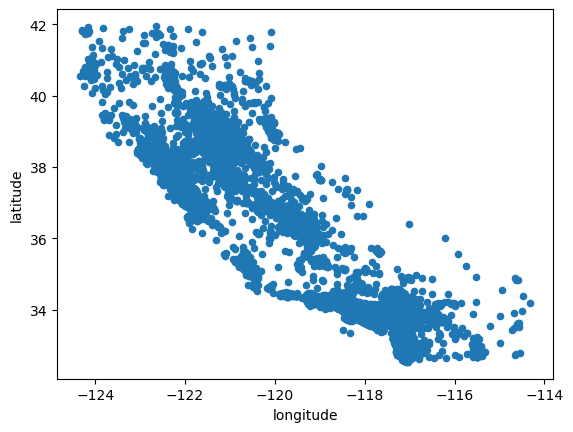

In [39]:
# draw scatter plot of housing points for given longitude and latitude 
df_housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

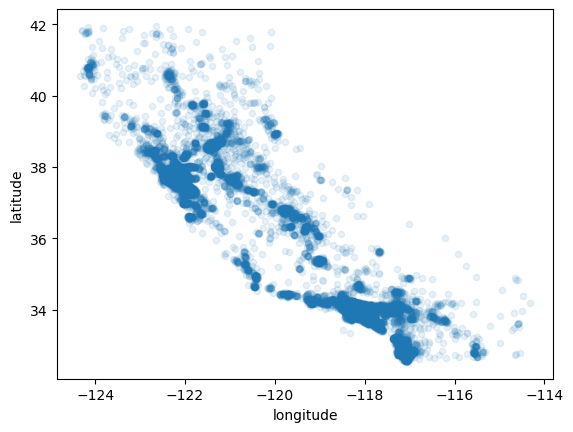

In [43]:
# put alpha to check density of the population on this map. With this we can see high density area and low density area.
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

#### The map above gives California State population density of housing dataset. 
    1. Looks like most of the settlements are along the bay area.

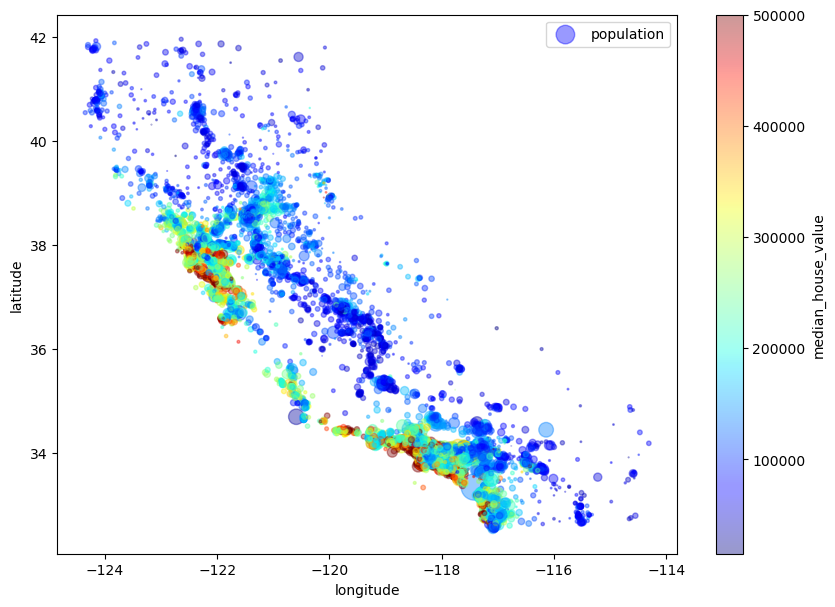

In [41]:
# Lets check the housing prices. Radius of cicle will be population size and color will represent the price; 
# Blue represents cheap, Red are expensive and cricle randius the population size. North of california around bay the prices are cheap.
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                s=df_housing["population"]/100, label="population", figsize=(10, 7), 
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Calcualte Correlation Cofficient 
1. Only tells you about <b> linear relationship </b> between two features 
2. Tells you whether is positive or negative relation 
3. Ranges from -1 to 1 with values:
```
    a. close to -1 -> Negative relationship 
    b. Close to 1 -> Positive relationship 
    c. Close to 0 -> No relationship 

Draw back of Correlation Coefficient is - It can only determine the linear relationship between features. 
Non linear relationships - it cannot tell much about
```    

In [45]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
corr_matrix = df_housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()

In [47]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [48]:
# look at the target variable correlations 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

#### From above it seems median_house_value is strongly correlated to median_income. i.e. if median_income goes up median_house_value will go up


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='latitude', ylabel='total_rooms'>],
       [<Axes

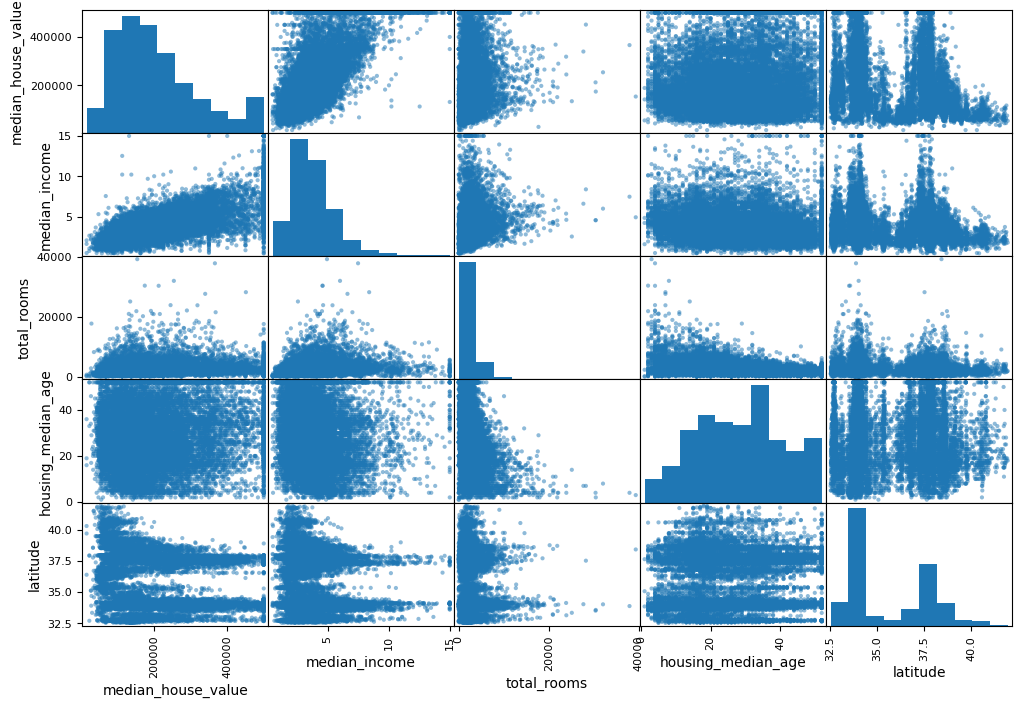

In [49]:
# Plot these observations 
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'latitude']
scatter_matrix(df_housing[attributes], figsize=(12,8))

### Check median_income feature correlation - which shows very strong relation to median_house_value 

<Axes: xlabel='median_income', ylabel='median_house_value'>

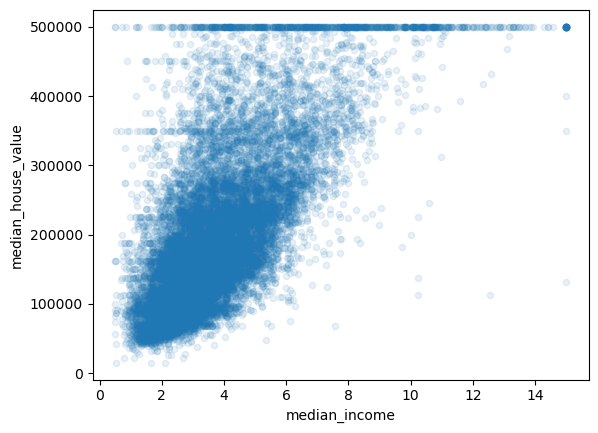

In [50]:
# Plot scatter plot for each point on median_house_value with median_income
df_housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

#### Notice few things from above diagram
    1. Certainly upward trend 
    2. Price capped at $500,000 is evident (so may points are aligned to x axis)
    3. Plot also reveals the capping around $450,000 and $350,000. May be around $280,000 as well.

    It will be imporant to remove these lines so that algorithims do not learn these quirks 

In [51]:
# Explore some of the features 
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Experimenting with other combinations
    1. Total_rooms alone make no sense in a district. Instead total rooms per houselhold will make more sense. 
    2. Similarly total number of bedrooms in a district makes no sense. Instead bedrooms should be compared against number of rooms
    3. Also population per household should be evaulated.

In [52]:
df_housing['total_rooms'].head()

12655    3873.0
15502    5320.0
2908     1618.0
14053    1877.0
20496    3536.0
Name: total_rooms, dtype: float64

In [53]:
df_housing['total_bedrooms'].head()

12655    797.0
15502    855.0
2908     310.0
14053    519.0
20496    646.0
Name: total_bedrooms, dtype: float64

In [54]:
df_housing['population'].head()

12655    2237.0
15502    2015.0
2908      667.0
14053     898.0
20496    1837.0
Name: population, dtype: float64

In [55]:
df_housing['households'].head()

12655    706.0
15502    768.0
2908     300.0
14053    483.0
20496    580.0
Name: households, dtype: float64

In [56]:
# create rooms per household feature - derieved feature 
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']

# create bedrooms per room feature - derieved feature 
df_housing['bedrooms_per_room'] = df_housing['total_bedrooms'] / df_housing['total_rooms']

# create population per household 
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [57]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [59]:
# remove the ocean_proximity column from the dataframe for correlation coefficient calculation 
columns = list(df_housing.columns)
columns.remove("ocean_proximity")

In [60]:
# lets check the correlation matrix 
corr_matrix = df_housing[columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

```
bedrooms_per_room seems to be more corrleated to median_housing_value than total_bedrooms and total_rooms. 
Negative value implies lesser the number of bedrooms per room ratio, median_house_value will be more. 
Also rooms_per_household is more inforamtive than that of total_rooms. So more the number of rooms - more expensive house will be 
```

# <b> 4. Prepare Data for ML Algo </b>
    1. Use the test and train set created in Stratified Sampling step 
    2. remove the median house value from training set 
    

In [61]:
df_housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning 
    1. Handle Missing features

In [62]:
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [65]:
# total_bedrooms has few missing features. Following are options - 
# 1. Get rid of corressponding districts        -   df_housing.dropna(subset=['total_bedtooms'])
# 2. Get rid of whole attribute                 -   df_housing.drop("total_bedrooms", axis=1)        
# 3. set them to zero, median, mean, values     -   df_housing.fillna(df_housing["total_bedrooms"].median())

# When going with 3rd option ensure to store the value of median df_housing["total_bedrooms"].median() so that to replace it in test set. 
# Or use SimpleImputer to get the median value of instance. However it works only on numerical data. So remove ocean_proximity 

from sklearn.impute import SimpleImputer

# use imputer function for getting the median values for all the features 
imputer = SimpleImputer(strategy="median")

# drop categorical data as SimpleImputer works only on numerical dataset 
df_housing_num = df_housing.drop("ocean_proximity", axis=1)

# perform fit 
imputer.fit(df_housing_num)

# get statistics 
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [66]:
df_housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [67]:
# just validate the median values selected by Simpleimputer 
df_housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [68]:
# Now use this imputer method to replace all the na values with median values 
X = imputer.transform(df_housing_num)
df_housing_tr = pd.DataFrame(X, columns=df_housing_num.columns, index=df_housing_num.index)
df_housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [69]:
df_housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# Handling Text and Categorical Attributes
    1. ML needs data in numerical format. Convert any String related or Categorical data to Number like ocean_proximity

In [70]:
df_housing_cat = df_housing[['ocean_proximity']]
df_housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [71]:
df_housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
# convert this categorical data to number
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_housing_cat_encoded = ordinal_encoder.fit_transform(df_housing_cat)

In [73]:
df_housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [74]:
# get the catogorized data labels 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Fix the values for ocean_proximity 
    1. Categories 0 and 4 are almost similar i.e. '<1H OCEAN' and 'NEAR BAY'
    2. But ML assumes the two 2 consecutive values near and two different values distant as it works on numerical data. 
    3. So in actual '<1H OCEAN' is more similar than its numerical value. 
    4. To fix this problem use one-hot encoding method to set one value of category to 1 and remaining to 0.

In [79]:
df_housing_cat[:10]

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [80]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_housing_1_hot = cat_encoder.fit_transform(df_housing_cat)
df_housing_1_hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [81]:
df_housing_1_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [82]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformer

In [ ]:
df_housing.columns

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

# give column index number
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True) -> None:
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household=X[:, rooms_ix] / X[:, household_ix]
        population_per_household=X[:, population_ix] / X[:, household_ix]

        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_room]
        
        return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df_housing.values)
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [84]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


# Transformation pipeline
    1. Create a pipeline to perform operations in foillowing sequence 
        a. Create imputer transformer and replace the missing values by median value 
        b. Add new attributes to the dataset like rooms_per_household, bedrooms_per_room and population_per_household
        c. Use Standard Scaler to bring all values of the housing data to common scale 
    

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def get_num_pipeline(imputer_strategy="median", add_attributes=True, scaler="standard"): 

    pipeline_value = [
        # replace na value with median 
        ('imputer', SimpleImputer(strategy=imputer_strategy)),      

        # add attirbute bedrooms_per_room as it has more correlation 
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=add_attributes)),
    ] 

    # check if scaler is standard or min-max 
    if scaler=="standard":
        pipeline_value.append(('std_scaler', StandardScaler()))
    else:
        pipeline_value.append(('minmax_scaler', MinMaxScaler()))

    # create data pipeline
    num_pipeline = Pipeline(pipeline_value)

    return num_pipeline

num_pipeline = get_num_pipeline(imputer_strategy="median", add_attributes=True, scaler="standard")
df_housing_tr = num_pipeline.fit_transform(df_housing_num)

In [93]:
df_housing_tr[:10]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 ,  0.00610923,
        -0.47451338],
       [-1.23109441,  1.08549869, -0.05196285, -0.66197687, -0.68632833,
        -0.62358295, -0.6521739 , -0.09422376, -0.24916496, -0.01928904,
        -0.075

In [94]:
# get list of features sent as input to the data pipeline 
num_pipeline.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [95]:
# check the data in dataframe post pipeline execution. CombinedAtrributesAdder will add 3 more attributes 
columns = list(num_pipeline.feature_names_in_) + ['rooms_per_household', 'population_per_household', 'bedroom_per_room']
pd.DataFrame(df_housing_tr, columns=columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedroom_per_room
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513
...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023


### Create a pipeline for numerical and Categorical sets

In [98]:
# Apply scaler for categorical data as well 
from sklearn.compose import ColumnTransformer

num_attribs = list(df_housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [99]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [103]:
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(df_housing)

In [106]:
full_pipeline.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'], dtype=object)

In [104]:
housing_prepared[:10]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

# <b> 5. Select and train model </b>
    1. Use housing prepared data to train the model. Provide labels for model to perform its training 
    2. Validate predictions by taking some data out from the training set 
    3. Validate the complete model with training set 
    4. Check the RMSE value

In [107]:
# target values 
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

### Use Linear Regression Model

In [108]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [110]:
# collect some data from training set and pass through the data pipeline for transformation
some_data = df_housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [111]:
# predict the values 
lin_reg.predict(some_data_prepared)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [112]:
# check for target values 
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

### Measure Predictions

In [113]:
from sklearn.metrics import mean_squared_error 

# get predictions of data which was used for training the model 
df_housing_predictions = lin_reg.predict(housing_prepared)

# get linear regression mean squared error 
lin_mse = mean_squared_error(housing_labels, df_housing_predictions)
lin_mse

4709785076.060029

In [114]:
lin_rmse = np.sqrt(lin_mse)

In [115]:
lin_rmse

np.float64(68627.87390018745)

### Above RMSE is 68628 - not a very satisfying score. When the median house price range from $120,000 to $265,000. Prediction Error of 68627 is not very good. 
### This means Model is clearly underfitting. To fix this we have - 
    a. Provide more features 
    b. Pick better/powerful model 

# Using Complex Model to reduce RMSE

In [116]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree are good to find non-linear data patterns 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [117]:
df_housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, df_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### From above score it seems either model is perfect or clearly overfitting. To check this we will need Cross Validation technique as we dont want to use test_data at this point of time

# Cross Validation - Method of splitting the training set into smaller training set and a validation set. then train model against smaller set and evaluate

In [118]:
from sklearn.model_selection import cross_val_score

# divide the training set to 10 folds and train on 9 folds and validate on 1 fold for 10 times. For each iteration validation is performed on 1 distinct fold
scroes = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
scroes 

array([-5.22023967e+09, -5.01424701e+09, -4.62401168e+09, -5.17383730e+09,
       -4.80645671e+09, -6.07838449e+09, -5.13068388e+09, -5.40398275e+09,
       -4.76729312e+09, -4.87963823e+09])

In [120]:
tree_rmse_scores = np.sqrt(-scroes)
tree_rmse_scores

array([72251.22610062, 70811.34799853, 68000.08591434, 71929.39104752,
       69328.61392367, 77963.99482744, 71628.79228943, 73511.78648072,
       69045.58722762, 69854.4073967 ])

In [131]:
def display_scores(scores):
    print ("Scores  : ", scores)
    print ("Mean    : ", scores.mean())
    print ("Standard Deviation: ", scroes.std())

In [132]:
display_scores(tree_rmse_scores)

Scores  :  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean    :  71432.52332065887
Standard Deviation:  393555129.2615288


### Shows Decision Tree is performing even worst than the linear regression. 

### Calculate cross validation score for Linear Regression model 

In [133]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores  :  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean    :  69104.07998247065
Standard Deviation:  393555129.2615288


# Use of Random Forest Regressor model to evaluate its performance

In [134]:
from sklearn.ensemble import RandomForestRegressor

# Random forest regressor take multiple decision tree and training with random features and averaging out the predicitons made. Number of tree in forest is n_estimator
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# predict values for training set 
df_housing_predictions = forest_reg.predict(housing_prepared)

# get mean squared error
forest_mse = mean_squared_error(housing_labels, df_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


np.float64(18650.698705770003)

In [135]:
# use the cross validation method to train it with 10 folds 
forest_scroes = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scroes = np.sqrt(-forest_scroes)
display_scores(forest_rmse_scroes)

Scores  :  [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean    :  50435.58092066179
Standard Deviation:  393555129.2615288


### Linear Regression RMSE is 69104.08
### Decision Tree RMSE is 71432.5
### Random Forest RMSE is 50435.6

``` 
Looks like Random forest is working way better than the Linear Regression and Decision Tree. 
However, RMSE score for trainig set was 18651 and validation set mean is 50436 for Random forest. 
It means the model is still overfitting to some of the data
``` 

# Save your model

In [137]:
import joblib

joblib.dump(lin_reg, "/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/lin_reg.pkl")
joblib.dump(tree_reg, "/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/tree_reg.pkl")
joblib.dump(forest_reg, "/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/forest_reg.pkl")

['/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/forest_reg.pkl']

# Fine Tuning

In [138]:
from sklearn.model_selection import GridSearchCV

# you can either fiddle with hyperparameter values to give you best score or let GridSearchCV do it for you.
# provide what range u want to search for
# below is GridSearchCV for forest regressor 
param_grid = [
    # try with 3 * 4=12 combinations of n_estimators and max_features 
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

    # then try with 2*3=6 combinations of n_estimators and max features 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

# forest_reg = RandomForestRegressor()

# grid search will execute 12+6 = 18 times with CV=5 times i.e. 18 * 5 = 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [140]:
# since 8 and 30 are maximum values. Lets try for more 
param_grid = [
    # try with 3 * 4=12 combinations of n_estimators and max_features 
    {'n_estimators': [30, 50, 80], 'max_features': [8, 10, 12, 14]},

    # then try with 2*3=6 combinations of n_estimators and max features 
    {'bootstrap': [False], 'n_estimators': [30, 50], 'max_features': [8, 10, 12]}
]

# forest_reg = RandomForestRegressor()

# grid search will execute 12+6 = 18 times with CV=5 times i.e. 18 * 5 = 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

In [141]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50,
                      random_state=42)

In [142]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

49898.98913455217 {'max_features': 8, 'n_estimators': 30}
49547.0229085019 {'max_features': 8, 'n_estimators': 50}
49363.302694321734 {'max_features': 8, 'n_estimators': 80}
50152.17503492269 {'max_features': 10, 'n_estimators': 30}
49774.245557689195 {'max_features': 10, 'n_estimators': 50}
49633.17967022299 {'max_features': 10, 'n_estimators': 80}
50620.27316229134 {'max_features': 12, 'n_estimators': 30}
50213.52181895326 {'max_features': 12, 'n_estimators': 50}
49907.094726619864 {'max_features': 12, 'n_estimators': 80}
50882.899551585615 {'max_features': 14, 'n_estimators': 30}
50554.597939205814 {'max_features': 14, 'n_estimators': 50}
50339.080515690395 {'max_features': 14, 'n_estimators': 80}
49445.442825321166 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
49199.78157486467 {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}
50070.91830608675 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
49767.615723069175 {'bootstrap': False, 'max_features'

In [143]:
# lets put this hyperparameters values calculated to get the scrore 
forest_reg = RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
df_housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, df_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


np.float64(0.0)

In [144]:
# use the cross validation method to train it with 10 folds 
forest_scroes = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scroes = np.sqrt(-forest_scroes)
display_scores(forest_rmse_scroes)

Scores  :  [50189.65066542 48198.96190221 45961.43242209 49920.471718
 46155.16804069 49365.14067114 50384.31477473 48139.52316278
 47265.92356339 52285.74589516]
Mean    :  48786.6332815605
Standard Deviation:  393555129.2615288


# RMSE for forest regressor was 50436 and now is 48787 which is quite good. 

# Get the feature importance details

In [145]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [146]:
feature_importances

array([7.51973136e-02, 6.89463980e-02, 4.11672205e-02, 1.47506331e-02,
       1.37722585e-02, 1.41574060e-02, 1.41624859e-02, 3.78265039e-01,
       5.28340848e-02, 1.09154165e-01, 4.72386386e-02, 7.14243859e-03,
       1.58273007e-01, 9.49149676e-05, 1.95228989e-03, 2.89170603e-03])

In [147]:
def display_feature_importance(feature_importance):
    extra_attributes = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
    cat_encoder = full_pipeline.named_transformers_["cat"]
    cat_one_hot_attributes = list(cat_encoder.categories_[0])
    attributes = num_attribs + extra_attributes + cat_one_hot_attributes
    return sorted(zip(feature_importance, attributes), reverse=True)

display_feature_importance(feature_importances)

[(np.float64(0.3782650393010832), 'median_income'),
 (np.float64(0.15827300731914679), 'INLAND'),
 (np.float64(0.10915416480968226), 'population_per_household'),
 (np.float64(0.0751973136370367), 'longitude'),
 (np.float64(0.06894639804118419), 'latitude'),
 (np.float64(0.05283408475299301), 'rooms_per_household'),
 (np.float64(0.047238638601855294), 'bedrooms_per_room'),
 (np.float64(0.041167220509572375), 'housing_median_age'),
 (np.float64(0.014750633108441321), 'total_rooms'),
 (np.float64(0.014162485941821177), 'households'),
 (np.float64(0.01415740599429698), 'population'),
 (np.float64(0.01377225850715796), 'total_bedrooms'),
 (np.float64(0.007142438589136601), '<1H OCEAN'),
 (np.float64(0.0028917060332133275), 'NEAR OCEAN'),
 (np.float64(0.0019522898857365612), 'NEAR BAY'),
 (np.float64(9.491496764245757e-05), 'ISLAND')]

# Grid search works well when exploring relatively few combinations, but when hyperparameters search space is large, it is often perferable to use Randomized Grid Search 

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17ceaa390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17d962790>},
                   random_state=42, scoring='neg_mean_squared_error')

In [149]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50700.386174457635 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50663.56285209076 {'max_features': 3, 'n_estimators': 75}
50523.94360622104 {'max_features': 3, 'n_estimators': 88}
49521.76339475961 {'max_features': 5, 'n_estimators': 100}
50306.36122428185 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


### Get Important Features score

In [150]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [151]:
# lets put this hyperparameters values calculated to get the scrore 
forest_rnd_reg = RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)
forest_rnd_reg.fit(housing_prepared, housing_labels)

df_housing_predictions = forest_rnd_reg.predict(housing_prepared)

forest_rnd_mse = mean_squared_error(housing_labels, df_housing_predictions)
forest_rnd_rmse = np.sqrt(forest_rnd_mse)
forest_rnd_rmse

np.float64(18087.06175308688)

In [152]:
# use the cross validation method to train it with 10 folds 
forest_rnd_scroes = cross_val_score(forest_rnd_reg, housing_prepared, housing_labels, 
                                scoring="neg_mean_squared_error", cv=10)
forest_rnd_rmse_scroes = np.sqrt(-forest_rnd_scroes)
display_scores(forest_rnd_rmse_scroes)

Scores  :  [50354.00021439 47651.4254546  45442.67466298 50141.83530778
 46802.06762325 48859.79190428 50351.96517225 47955.72351615
 46922.55019047 53025.18182024]
Mean    :  48750.72158663896
Standard Deviation:  393555129.2615288


# RMSE mean score has gone further down to 48750.72 

In [153]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.13721236e-02, 6.28935545e-02, 4.30092772e-02, 1.64086555e-02,
       1.55670107e-02, 1.64745016e-02, 1.53753328e-02, 3.45190341e-01,
       5.95258394e-02, 1.10738856e-01, 6.97457058e-02, 8.67185471e-03,
       1.58662678e-01, 6.67961748e-05, 2.68890007e-03, 3.60857368e-03])

In [154]:
display_feature_importance(feature_importances)

[(np.float64(0.34519034100319007), 'median_income'),
 (np.float64(0.15866267751808205), 'INLAND'),
 (np.float64(0.1107388558918982), 'population_per_household'),
 (np.float64(0.07137212359389712), 'longitude'),
 (np.float64(0.06974570580531124), 'bedrooms_per_room'),
 (np.float64(0.06289355447798799), 'latitude'),
 (np.float64(0.05952583935728965), 'rooms_per_household'),
 (np.float64(0.04300927718434754), 'housing_median_age'),
 (np.float64(0.016474501566255607), 'population'),
 (np.float64(0.016408655481155894), 'total_rooms'),
 (np.float64(0.015567010725199516), 'total_bedrooms'),
 (np.float64(0.015375332753137499), 'households'),
 (np.float64(0.008671854710510334), '<1H OCEAN'),
 (np.float64(0.003608573683092268), 'NEAR OCEAN'),
 (np.float64(0.002688900073839445), 'NEAR BAY'),
 (np.float64(6.679617480568294e-05), 'ISLAND')]

In [155]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

# Evaluate Test Data now

In [156]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [157]:
# set the final model using hyperparameters from Random Grid Search 
final_model = rnd_search.best_estimator_

# create test data and labels 
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# transform the test data 
X_test_prepared = full_pipeline.transform(X_test)

# make predictions on test data 
final_predictions = final_model.predict(X_test_prepared)

In [158]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [159]:
final_rmse

np.float64(46981.841079394515)

# Create 95% Confidence Interval

### Creating using scipy library

In [160]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45009.73121871, 48874.43992557])

### Creating Manually

In [161]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(np.float64(45009.7312187091), np.float64(48874.439925573846))

### Using Z Score instead of T-Score 


In [162]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(np.float64(45010.32226226666), np.float64(48873.895611725755))

# Save the model

In [164]:
# save the model 
import joblib

joblib.dump(final_model, '/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/final_model.pkl')

['/Users/rohitabhishek/Documents/Programming_Workspace/Github-Programs/hands-on-ml/SELF/OUTPUT/Chapter2/final_model.pkl']

# Excerices

#### Q1: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(111095.06635291968)

# Refer Solution in HandonML Jupyter files